# 4-1 로지스틱 회귀

이제 한빛 마케팅팀은 특정 물고기 확률 럭키백을 출시한다!!

In [4]:
import pandas as pd

In [5]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [6]:
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [7]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()

In [8]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [9]:
fish_target = fish['Species'].to_numpy()

In [10]:
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
ss = StandardScaler()
ss.fit(train_input) 
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
kn = KNeighborsClassifier(n_neighbors = 3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [17]:
print(kn.classes_) #unique는 알파벳 순서대로, classese_는 훈련 데이터 클래스가 나오는 순서대로 

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [18]:
print(kn.predict((test_scaled[:5])))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [19]:
import numpy as np 
proba = kn.predict_proba(test_scaled[:5])

In [20]:
print(np.round(proba, decimals=4)) #참고로 출력값은 classe_순임

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [21]:
distances, indexs = kn.kneighbors(test_scaled[3:4]) #세번째 샘플에 대해서 거리, 인덱스를 출력함 
print(train_target[indexs]) #무게, 길이, 두께등의 정보가 있는 3번째 샘플에 대해 그 주변에 있는 index(물고기) 가 뭐가 있는지 판단

[['Roach' 'Perch' 'Perch']]


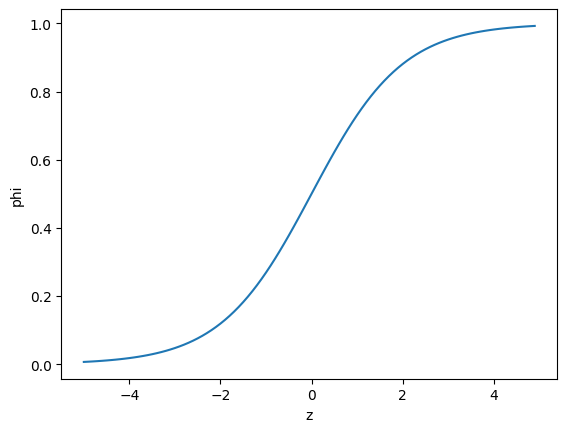

In [22]:
import numpy as np
import matplotlib.pyplot as plt

z = np.arange(-5,5,0.1)
phi = 1/(1+np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()

시그모이드 함수를 사용해서 0-1사이값만 써야 됨(확률 값이니까!)
이진 분류일 경우 시그모이드 함수값이 0.5보다 크면 양성 클래서 0.5거나 0.5보다 작으면 음성 클래스로 분류함

In [23]:
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [24]:
bream_smelt_indexs = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexs]
target_bream_smelt = train_target[bream_smelt_indexs]

In [25]:
target_bream_smelt #True 값인 도미와 빙어에 관련 된 것만 나온 것을 알 수 있음

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Bream', 'Smelt',
       'Bream', 'Smelt', 'Smelt', 'Bream', 'Bream', 'Bream', 'Bream',
       'Bream', 'Bream', 'Bream', 'Bream', 'Smelt', 'Bream', 'Smelt',
       'Smelt', 'Bream', 'Smelt', 'Bream', 'Bream'], dtype=object)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [28]:
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [29]:
print(lr.predict_proba(train_bream_smelt[:5]))

[[0.99760007 0.00239993]
 [0.02737325 0.97262675]
 [0.99486386 0.00513614]
 [0.98585047 0.01414953]
 [0.99767419 0.00232581]]


첫번 째 열이 음성 클래스(0)에 대한 확률이고 두번째 열이 양성 클래스(1)에 대한 확률이다 (일반적으로)  
근데 뭐가 빙어고 도미인지 알 수 없으니 classes_로 확인해보자

In [30]:
print(lr.classes_) 

['Bream' 'Smelt']


In [31]:
print(lr.coef_, lr.intercept_) 

[[-0.40451732 -0.57582787 -0.66248158 -1.01329614 -0.73123131]] [-2.16172774]


로지스틱 회귀 모델이 학습한 방정식은 다음과 같다!  
![로지스틱 회귀 모델](https://docs-us.oss-us-west-1.aliyuncs.com/img/blog-cover-images/logistic-regression.png)

사진에서 보면 이제 Xi에 들어갈 것이, Weight, Length... 이 되고 맨 마지막 상수가 -2.16172774이게 되는 것이다!


In [32]:
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions) #이 값들이 5개 샘플에 대한 결과값인 Y라고 볼 수 있다!

[-6.02991358  3.57043428 -5.26630496 -4.24382314 -6.06135688]


이제 이 값들을 시그모이드 함수에 통과시키면 확률을 얻을 수 있다

In [33]:
from scipy.special import expit
print(expit(decisions))

[0.00239993 0.97262675 0.00513614 0.01414953 0.00232581]


이 값들을 살펴보면 predict_proba()매세트 출력의 두 번째 열의 값과 동일하다 즉 dicision_function() 메서드는  
양성 클래스에 대한 Y값을 반환하게 된다!

In [34]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [35]:
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [36]:
proda = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

[[0.    0.    1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.    0.   ]
 [0.    0.    0.    1.    0.    0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]
 [0.    0.    0.667 0.    0.333 0.    0.   ]]


In [37]:
print(lr.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [38]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


다중 분류에서는 시그모이드 함수가 아닌 소프트맥스 함수를 사용한다! 
시그모이드는 하나의 선형 방정식을 0-1로 압축
소프트맥스는 여러개의 선형 방정식을 0-1로 압축하고 전체 합이 1이 되도록 만듦
![소프트맥스](https://camo.githubusercontent.com/a86433e3144d926be824ce244637aa992eb594e229105b44263c8860e2b8aac9/68747470733a2f2f74312e6461756d63646e2e6e65742f6366696c652f746973746f72792f393936344238343935433832304433363038)

In [39]:
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.51   1.04   5.17  -2.76   3.34   0.35  -0.63]
 [-10.88   1.94   4.78  -2.42   2.99   7.84  -4.25]
 [ -4.34  -6.24   3.17   6.48   2.36   2.43  -3.87]
 [ -0.69   0.45   2.64  -1.21   3.26  -5.7    1.26]
 [ -6.4   -1.99   5.82  -0.13   3.5   -0.09  -0.7 ]]


In [40]:
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.842 0.    0.135 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.934 0.015 0.016 0.   ]
 [0.011 0.034 0.305 0.006 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


# 4-2 확률적 경사 하강법

In [41]:
import pandas as pd

In [42]:
fish = pd.read_csv('http://bit.ly/fish_csv_data')

In [43]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [44]:
fish_input = fish[['Weight','Length', 'Diagonal', 'Height', 'Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
ss = StandardScaler()

In [49]:
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [50]:
from sklearn.linear_model import SGDClassifier

In [63]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\kimso\anaconda3\envs\sol3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [63]:
sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42) #책에서는 반복이 10이지만 높은 정확도를 위해 100으로 늘렸다!!
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


C:\Users\kimso\anaconda3\envs\sol3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


모델을 이어서 훈련하기 위해서는 partial_fit()을 사용하자~ 드디어 모델을 이어서 학습할 수 있게됐다~!!! 주의!! 여기서 다시 fit()을 하면 모델이 초기화가 
되는 <span style="color: red;">대참사</span>가.... 일어난다..

In [64]:
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7983193277310925
0.775


In [65]:
import numpy as np
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

In [66]:
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [67]:
for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes) #부분적 데이터만 학습하기 때문에 classes로 전체 label값을 줘야함!
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

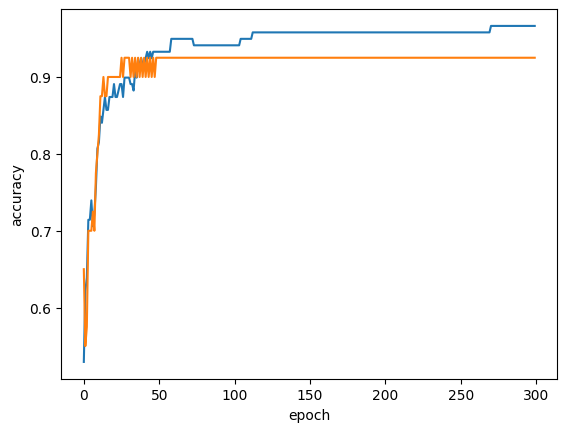

In [68]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [70]:
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None,random_state=42) 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925


In [74]:
sc = SGDClassifier(loss='log_loss', max_iter=100, random_state=42) 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8739495798319328
0.8


여기서 tol의 엄청난 능력을 볼 수 있는데... tol을 넣냐 안 넣냐에 따라 정확도가 엄청 달라진다..SGDClassifier는 기본적으로 조기 종료을 지원하는데  
tol=None은 조기 종료 없이 무!!족언!!!! 100번 설정하면 100번 훈련시키니 정확도가 높아진다!!

In [76]:
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42) 
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9495798319327731
0.925


사실 loss매개변수의 기본값은 hinge이다!! 근데 왜 log_loss을 쓰게 한거지..... log_loss은 로지스틱 확률에서 잘 쓰이고 우린 확률을 지금  
중점으로 배워서 그런가.. 모르겠다!!!

# 끝~~~~